# Simulation of an ethylene reactor in Python

### This program solves a system of differential equations of a cracking reactor using the classic Runge Kutta method (RK4) in a vectorized form. The final plot shows the changes in concentrations of the components as the reaction progresses. 

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialize parameters
pi = np.pi

#Step size and total number of iterations
s = 0.3
if (85%s != 0):
    z = np.arange(0,85,s)
else:
    z = np.arange(0,85+s,s)
# Total length
L = len(z)

# Parameters
D = 0.1;
r = D/2
v_0 = 162.9 
rho_0 = 3.278
mu = 2.4e-5
Re = rho_0*v_0*D/mu 
R = 8.314
T = 850+273

#Initial Flux
N_e0 = 99/(pi*(5/100)**2)
N_y0 = 1/(pi*(5/100)**2)
N_w0 = (66+2/3)/(pi*(5/100)**2)

In [3]:
# Enter lambda functions to model species rate equations
R_e = lambda e,y,h,m,b,w,p: -3*1.2*e*p/(R*T*(e+y+h+m+b+w)) - 28*(p*e/(R*T*(e+y+h+m+b+w)))**(1/2)
R_y = lambda e,y,h,m,b,w,p: 28*(p*e/(R*T*(e+y+h+m+b+w)))**(1/2)
R_h = lambda e,y,h,m,b,w,p: 28*(p*e/(R*T*(e+y+h+m+b+w)))**(1/2)
R_m = lambda e,y,h,m,b,w,p: 2*1.2*e*p/(R*T*(e+y+h+m+b+w))
R_b = lambda e,y,h,m,b,w,p: 1.2*e*p/(R*T*(e+y+h+m+b+w))
# Pressure
R_p = lambda e,y,h,m,b,w,p: -0.079*rho_0*v_0*R*T*(e+y+h+m+b+w)/(p*r*(Re)**0.25)

In [4]:
# Create vectors to contain species flux values
[E, Y, H, M, B, W, P] = [np.zeros(L), np.zeros(L), np.zeros(L), np.zeros(L), np.zeros(L), np.zeros(L), np.zeros(L)]
[CE, CY, CM, CB] = [np.zeros(L), np.zeros(L), np.zeros(L), np.zeros(L)]

# Initialialize variables for RK4 loop
p = 12*101325
e = N_e0
y = N_y0
h = 0
m = 0
b = 0
w = N_w0 # Steam (inert) will also be present

In [5]:
# RK4 Loop
for i in range(0,L):
    [E[i], Y[i], H[i], M[i], B[i], W[i], P[i]] = [e, y, h, m, b, w, p]

    #Concentration vector update
    denom = R*T*(e+y+h+m+b+w)
    CE[i] = e*p/denom
    CY[i] = y*p/denom
    CM[i] = m*p/denom
    CB[i] = b*p/denom


    # K1 Values for RK4
    k1e= s*R_e(e,y,h,m,b,w,p)
    k1y= s*R_y(e,y,h,m,b,w,p)
    k1h= s*R_h(e,y,h,m,b,w,p)
    k1m= s*R_m(e,y,h,m,b,w,p)
    k1b= s*R_b(e,y,h,m,b,w,p)
    k1w= 0
    k1p= s*R_p(e,y,h,m,b,w,p)


    # K2 values for RK4
    k2e= s*R_e(e+0.5*k1e, y+0.5*k1y, h+0.5*k1h, m+0.5*k1m, b+0.5*k1b, w+0.5*k1w, p+0.5*k1p)
    k2y= s*R_y(e+0.5*k1e, y+0.5*k1y, h+0.5*k1h, m+0.5*k1m, b+0.5*k1b, w+0.5*k1w, p+0.5*k1p)
    k2h= s*R_h(e+0.5*k1e, y+0.5*k1y, h+0.5*k1h, m+0.5*k1m, b+0.5*k1b, w+0.5*k1w, p+0.5*k1p)
    k2m= s*R_m(e+0.5*k1e, y+0.5*k1y, h+0.5*k1h, m+0.5*k1m, b+0.5*k1b, w+0.5*k1w, p+0.5*k1p)
    k2b= s*R_b(e+0.5*k1e, y+0.5*k1y, h+0.5*k1h, m+0.5*k1m, b+0.5*k1b, w+0.5*k1w, p+0.5*k1p)
    k2w= 0
    k2p= s*R_p(e+0.5*k1e, y+0.5*k1y, h+0.5*k1h, m+0.5*k1m, b+0.5*k1b, w+0.5*k1w, p+0.5*k1p)

    # K3 values for RK4
    k3e= s*R_e(e+0.5*k2e, y+0.5*k2y, h+0.5*k2h, m+0.5*k2m, b+0.5*k2b, w+0.5*k2w, p+0.5*k2p)
    k3y= s*R_y(e+0.5*k2e, y+0.5*k2y, h+0.5*k2h, m+0.5*k2m, b+0.5*k2b, w+0.5*k2w, p+0.5*k2p)
    k3h= s*R_h(e+0.5*k2e, y+0.5*k2y, h+0.5*k2h, m+0.5*k2m, b+0.5*k2b, w+0.5*k2w, p+0.5*k2p)
    k3m= s*R_m(e+0.5*k2e, y+0.5*k2y, h+0.5*k2h, m+0.5*k2m, b+0.5*k2b, w+0.5*k2w, p+0.5*k2p)
    k3b= s*R_b(e+0.5*k2e, y+0.5*k2y, h+0.5*k2h, m+0.5*k2m, b+0.5*k2b, w+0.5*k2w, p+0.5*k2p)
    k3w= 0
    k3p= s*R_p(e+0.5*k2e, y+0.5*k2y, h+0.5*k2h, m+0.5*k2m, b+0.5*k2b, w+0.5*k2w, p+0.5*k2p)

    # K4 values for RK4
    k4e = s*R_e(e+k3e, y+k3y, h+k3h, m+k3m, b+k3b, w+k3w, p+k3p)
    k4y= s*R_y(e+k3e, y+k3y, h+k3h, m+k3m, b+k3b, w+k3w, p+k3p)
    k4h= s*R_h(e+k3e, y+k3y, h+k3h, m+k3m, b+k3b, w+k3w, p+k3p)
    k4m= s*R_m(e+k3e, y+k3y, h+k3h, m+k3m, b+k3b, w+k3w, p+k3p)
    k4b= s*R_b(e+k3e, y+k3y, h+k3h, m+k3m, b+k3b, w+k3w, p+k3p)
    k4w= 0
    k4p= s*R_p(e+k3e, y+k3y, h+k3h, m+k3m, b+k3b, w+k3w, p+k3p)


    # Update flux values and pressure
    e = e + (k1e + 2*k2e + 2*k3e + k4e)/6
    y = y + (k1y + 2*k2y + 2*k3y + k4y)/6
    h = h + (k1h + 2*k2h + 2*k3h + k4h)/6
    m = m + (k1m + 2*k2m + 2*k3m + k4m)/6
    b = b + (k1b + 2*k2b + 2*k3b + k4b)/6
    w = w + (k1w + 2*k2w + 2*k3w + k4w)/6
    p = p + (k1p + 2*k2p + 2*k3p + k4p)/6

    # Store selectivity on the last iteration
    if (i == L-1):
        SY = (Y[i]-Y[0])/(Y[i]-Y[0]+M[i]+B[i]+H[i])

The selectivity of ethylene is 0.3785


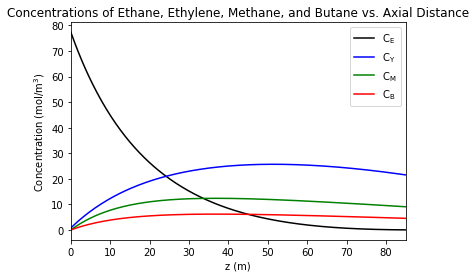

In [6]:
# Print result for ethylene selectivity and plot concentrations
print("The selectivity of ethylene is",round(SY,4))

plt.plot(z, CE, color="black", label="$\mathregular{C_E}$")
plt.plot(z, CY, color = "blue", label="$\mathregular{C_Y}$")
plt.plot(z, CM, color = "green", label="$\mathregular{C_M}$")
plt.plot(z, CB, color = "red", label="$\mathregular{C_B}$")
plt.xlim(0,85)
plt.legend(loc="upper right")
plt.xlabel("z (m)")
plt.ylabel("Concentration (mol/$\mathregular{m^3}$)")
plt.title("Concentrations of Ethane, Ethylene, Methane, and Butane vs. Axial Distance")
plt.show()